# Parte 1: Reporte

The Effects of Exposure to Better Neighborhoods on Children: New Evidence from the Moving to Opportunity Experiment

Dana Rodriguez Sandi 20190910
Alessandra Rossell  Poma 20140656 (Python)

En el artículo se realiza un experimento para comprobar el efecto que tiene el área de la ciudad   en el que se desarrollan los niños menos de 13 años. Se comprueba que en efecto los niños y las niñas que sus familias se mudaron a una mejor área, es decir,  que pasaron de un área de alta pobreza a una de área con menor pobreza reportaron mejores resultados económicos en su futuro. Con los datos recolectados también se llega a la conclusión de que existe una distinción en los resultados entre aquellos niños y niñas que tenían menos de 13 años y el grupo de 13 a 18 años de edad.

 Entre las  fortalezas del documento se encuentra la cantidad y la pertinencia  de las  variables que fueron utilizadas en la investigación:  el ingreso futuro ,la  asistencia a la educación superior, la calidad del centro de estudios, la cantidad de impuestos pagados en el futuro, el estado civil y  las características del área donde viven en la adultez. Las variables son relevantes pero una debilidad que hace ligeramente menos objetivos los resultados es que el ingreso se basa en la recaudación de impuestos presentada y en algún caso se podría observar ingresos informales. 

El aporte principal del artículo es que no hace un análisis superficial para comprobar la hipótesis, ya que no solo analiza el incremento en el  ingreso en la adultez de los niños que pasaron por este proceso de mudanza a una zona mejor y los compara , sino que analiza una amplia gama de variables en las que se observa que la calidad de vida realmente mejoró.Por otro lado, se comprueba que este tipo de iniciativas como el MTO realmente son significativas para mejorar el rendimiento futuro de los niños, pues  se demuestra la viabilidad de este en los resultados obtenidos  en las familias involucradas. De esta manera, se logra promover  este tipo de programas con impacto social positivo.


Una próxima línea de investigación del documento podría consistir en cambiar el enfoque  el tema de la trascendencia de mudarse a una mejor zona y analizarlo desde una perspectiva internacional. Se podría analizar el efecto que ha tenido la migración de una familia  desde un país subdesarrollado a uno con mejores oportunidades en mejoras económicas y de calidad de vida. Para esto se podrían tomar en el documento: "Migration  and Quality of Life" (2006) https://www.researchgate.net/publication/350405726_Migration_and_the_Quality_of_Life



# Parte 2: Códigos


In [1]:
import numpy as np 
import pandas as pd
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import seaborn as sns
import pylab as plt


# Ejercicio 1: Ploteo de Histogramas

# 1.1


In [2]:
base = pd.read_csv('https://github.com/matheusfacure/python-causality-handbook/raw/master/causal-inference-for-the-brave-and-true/data/online_classroom.csv')
print(base.shape)
base.head()

(323, 10)


,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000


* Creando columna "clas_format" asignando "face_to_face" si no es ninguno de los dos, "online" si es  "format_ol" y  "blended" si es "format_blended".

In [3]:
base2 = (base.assign(class_format = np.select(
     [base["format_ol"].astype(bool), base["format_blended"].astype(bool)],
     ["online", "blended"],
     default="face_to_face" 
 ))) 
base2

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,face_to_face
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,face_to_face
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,blended
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,blended
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,online
...,...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000,blended
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000,online
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000,online
321,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,83.29997,online


* Estableciendo los valores de clas_format como columnas

In [4]:
pd.get_dummies(base2,columns=["class_format"]).head()

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format_blended,class_format_face_to_face,class_format_online
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,0,1,0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,0,1,0
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,1,0,0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,1,0,0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,0,0,1


* **Histogramas informativos para la interpretacion**

Text(19.309791666666662, 0.5, 'Students')

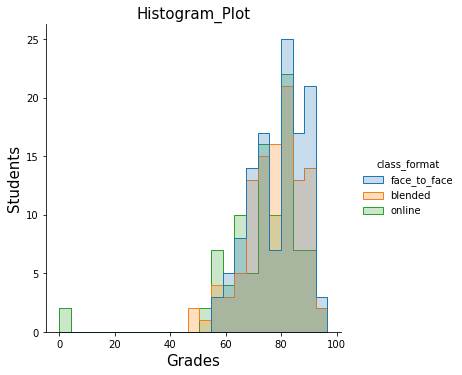

In [5]:
sns.displot(base2, x="falsexam", hue= "class_format",element="step")
plt.title("Histogram_Plot", fontsize=15)
plt.xlabel("Grades", fontsize=15)
plt.ylabel("Students", fontsize=15)

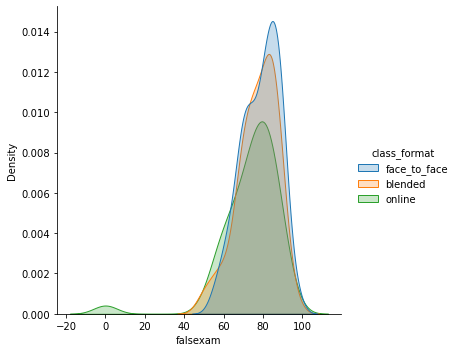

In [6]:
sns.displot(base2, x="falsexam", hue= "class_format",kind="kde", fill=True)

# 1.2

De acuerdo a los gráficos, podemos obsevar que las notas son menores cuando las clases son online, luego viene la modalidad blended, demostrándose que la modalidad "face to face" tendrían un mejor promedio de notas. Por tanto, las clases presenciales es el mejor método para que los estudiantes puedan aprender mejor y por ende tener un rendimiento académico alto. 




# Ejercicio 2: Difference-in-means estimator.


Extraccion de las columnas 'class_format' y 'falsexam' de la base de datos 2

In [7]:
base_promedio = base2[['class_format','falsexam']]
base_promedio

,class_format,falsexam
0,face_to_face,63.29997
1,face_to_face,79.96000
2,blended,83.37000
3,blended,90.01994
4,online,83.30000
...,...,...
318,blended,68.36000
319,online,70.05000
320,online,66.69000
321,online,83.29997


* Generando un grupo para concentrarnos en los valores que sean "face_to_face" y "online"
* Importarlo en una nueva base_3

In [8]:
Grups = ["face_to_face","online"]
base_3 = base_promedio[base_promedio['class_format'].isin(Grups)]
base_3

,class_format,falsexam
0,face_to_face,63.29997
1,face_to_face,79.96000
4,online,83.30000
5,online,88.34996
7,face_to_face,90.00000
...,...,...
316,face_to_face,91.65000
317,face_to_face,84.99000
319,online,70.05000
320,online,66.69000


In [9]:
base_3.groupby(["class_format"]).mean ()
Diferencia_ftf_on = 78.547485-73.635263
Diferencia_ftf_on

4.912222

Se muestra una diferencia de 4.91222, casi 5 puntos, y nuevamente obtenemos que las clases presenciales son mejores para obtener un alto rendimiento académico. 

# Ejercicio 3: Difference-in-means estimator via linear regression



In [10]:
#Generando una copia de la base de datos 3


* La columna Dummy clasifica los valores face_to_face en 0 y online en 1

In [11]:
base_OLS = base_3
base_OLS['Dummy'] = base_OLS['class_format']
base_OLS.Dummy=base_OLS.Dummy.replace({"face_to_face":0, "online":1 })
base_OLS

C:\Users\aless\AppData\Local\Temp\ipykernel_14588\1151347780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_OLS['Dummy'] = base_OLS['class_format']
C:\Users\aless\AppData\Local\Temp\ipykernel_14588\1151347780.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_OLS.Dummy=base_OLS.Dummy.replace({"face_to_face":0, "online":1 })


,class_format,falsexam,Dummy
0,face_to_face,63.29997,0
1,face_to_face,79.96000,0
4,online,83.30000,1
5,online,88.34996,1
7,face_to_face,90.00000,0
...,...,...,...
316,face_to_face,91.65000,0
317,face_to_face,84.99000,0
319,online,70.05000,1
320,online,66.69000,1


In [12]:
OLS = sm.OLS.from_formula("falsexam ~ Dummy", data = base_OLS).fit()
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               falsexam   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     8.554
Date:                Tue, 08 Nov 2022   Prob (F-statistic):            0.00382
Time:                        18:05:42   Log-Likelihood:                -837.85
No. Observations:                 214   AIC:                             1680.
Df Residuals:                     212   BIC:                             1686.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     78.5475      1.113     70.563      0.000      76.353      80.742
Dummy         -4.9122      1.680     -2.925      0.004      -8.223      -1.601
==============================================================================
Omnibus:                      129.000   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1179.385
Skew:                          -2.179   Prob(JB):                    7.94e-257
Kurtosis:                      13.643   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""